refer - https://github.com/saritmaitra/LSTM_GRU_CIPLA/blob/main/LSTM_%26_GRU_CIPLA.ipynb

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.preprocessing import StandardScaler
from datetime import datetime, date
from datetime import timedelta
import yfinance as yf

In [2]:
ticker_list = []
n1 = input('enter the number of stocks: ')
number_1 = int(n1)

while len(ticker_list) < number_1:
    item = input('Enter item to buy: ')

    # make sure item is not in list before appending
    if item not in ticker_list:
        ticker_list.append(item)

enter the number of stocks: 3
Enter item to buy: AAPL
Enter item to buy: MSFT
Enter item to buy: SPY


In [3]:
end_date = datetime.now()
start_date = end_date - timedelta(days = 10000)

def get_stock_data(stock_list,weight, start_date, end_date):
  D = {}
  for i in range(len(weight)) :
    D[i] = yf.download(stock_list[i], start_date, end_date)

  df = pd.DataFrame()
  for i in range(len(weight)-1) :
    df = df.add(D[i].mul(weight[i]), fill_value = 0)

  return df

In [4]:
# for weights currently I am using random allocation but I wll export optimized weights
import random

weights = [random.random() for _ in range(len(ticker_list))]

In [5]:
df = get_stock_data(ticker_list, weights, start_date, end_date)
df.reset_index(inplace = True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
print(df.info())
print('\n')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6891 entries, 0 to 6890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6891 non-null   datetime64[ns]
 1   Open       6891 non-null   float64       
 2   High       6891 non-null   float64       
 3   Low        6891 non-null   float64       
 4   Close      6891 non-null   float64       
 5   Adj Close  6891 non-null   float64       
 6   Volume     6891 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 377.0 KB
None


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
df = df.fillna(method ='pad') # filling the missing values with previous ones
print (df.isnull().sum())
print('\n')
print('There are {} number of days in the dataset.'.format(df.shape[0]))

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


There are 6891 number of days in the dataset.


<ipython-input-8-bfd6126ebbc7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( dataset["Open"] , ax=axes[0, 0])
<ipython-input-8-bfd6126ebbc7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( dataset["High"] , ax=axes[0, 1])
<ipython-input-8-bfd6126ebbc7>:10: UserWarning: 

`distplot` is a de

<Figure size 1000x600 with 0 Axes>

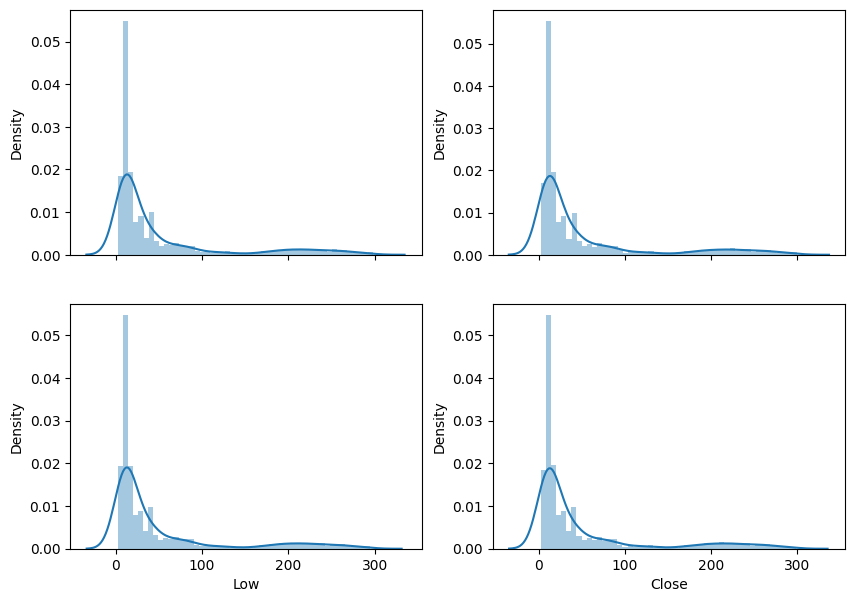

,Open,High,Low,Close
count,6891.000000,6891.000000,6891.000000,6891.000000
mean,51.795622,52.353186,51.246694,51.822344
std,71.763097,72.525562,71.030355,71.817930
min,2.604424,2.620296,2.583260,2.592493
25%,9.832085,9.971194,9.696761,9.830266
50%,17.070600,17.291094,16.821839,17.079345
75%,52.053775,52.298233,51.832230,52.076969
max,298.023465,299.617977,294.990695,298.305033


In [8]:
import seaborn as sns
plt.figure(figsize=(10,6))

dataset = df[['Open', 'High', 'Low', 'Close']] # dataframe with open, high, low, close

print("\n")
f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True)
sns.distplot( dataset["Open"] , ax=axes[0, 0])
sns.distplot( dataset["High"] , ax=axes[0, 1])
sns.distplot(dataset["Low"] , ax=axes[1, 0])
sns.distplot( dataset["Close"] , ax=axes[1, 1])
plt.show()
print('\n')
dataset.describe()

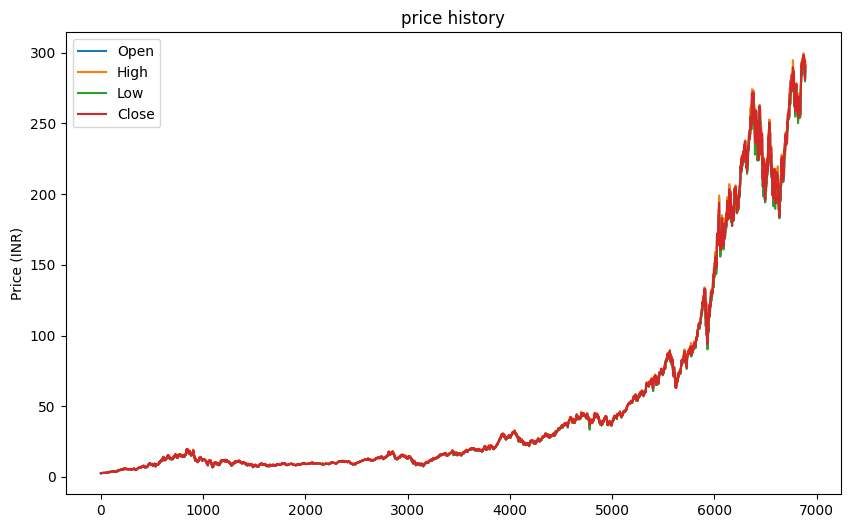

In [9]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(10,6))
plt.plot(df["Open"])
plt.plot(df["High"])
plt.plot(df["Low"])
plt.plot(df["Close"])
plt.title('price history')
plt.ylabel('Price (INR)')
plt.legend(['Open','High','Low','Close'], loc='best')
plt.show()

In [10]:
import copy
data = dataset.copy()
tek_ind_1 = copy.deepcopy(data)
tek_ind_2 = copy.deepcopy(data)


In [11]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib


--2024-01-12 13:24:03--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-01-12 13:24:03--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://zenlayer.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-01-12 13:24:03--  http://zenlayer.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving zenlayer.dl.s

In [12]:
from talib import RSI, BBANDS

tek_ind_1['daily_return'] = tek_ind_1.Close.pct_change().fillna(0)
tek_ind_1['cum_daily_return'] = (1 + tek_ind_1['daily_return']).cumprod()

tek_ind_1['H-L'] = tek_ind_1.High - dataset.Low

tek_ind_1 ['C-O'] = tek_ind_1.Close - tek_ind_1.Open

tek_ind_1['10day MA'] = tek_ind_1.Close.shift(1).rolling(window = 10).mean().fillna(0)
tek_ind_1['50day MA'] = tek_ind_1.Close.shift(1).rolling(window = 50).mean().fillna(0)
tek_ind_1['200day MA'] = tek_ind_1.Close.shift(1).rolling(window = 200).mean().fillna(0)

tek_ind_1['rsi'] = talib.RSI(tek_ind_1.Close.values, timeperiod = 14)

tek_ind_1['Williams %R'] = talib.WILLR(tek_ind_1.High.values,
                                     tek_ind_1.Low.values,
                                     tek_ind_1.Close.values, 14)

# Create 7 and 21 days Moving Average
tek_ind_1['ma7'] = tek_ind_1.Close.rolling(window=7).mean().fillna(0)
tek_ind_1['ma21'] = tek_ind_1.Close.rolling(window=21).mean().fillna(0)

# Creating MACD
tek_ind_1['ema_26'] = tek_ind_1.Close.ewm(span=26).mean().fillna(0)
tek_ind_1['ema_12'] = tek_ind_1.Close.ewm(span=12).mean().fillna(0)
tek_ind_1['macd'] = (tek_ind_1['ema_12'] - tek_ind_1['ema_26'])

# Creating Bollinger Bands
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = tek_ind_1.Close.rolling(window).mean()
rolling_std = tek_ind_1.Close.rolling(window).std()
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
#B['Rolling Mean'] = rolling_mean.fillna(0)
tek_ind_1['bb_high'] = (rolling_mean + (rolling_std * no_of_std)).fillna(0)
tek_ind_1['bb_low'] = (rolling_mean - (rolling_std * no_of_std)).fillna(0)

# Create Exponential moving average
tek_ind_1['ema'] = tek_ind_1.Close.ewm(com=0.5).mean()

# Create Momentum
tek_ind_1['momentum'] = tek_ind_1.Close - 1

tek_ind_1.head(20)

,Open,High,Low,Close,daily_return,cum_daily_return,H-L,C-O,10day MA,50day MA,...,Williams %R,ma7,ma21,ema_26,ema_12,macd,bb_high,bb_low,ema,momentum
0,2.637743,2.647198,2.622321,2.629862,0.000000,1.000000,0.024876,-0.007881,0.000000,0.0,...,NaN,0.000000,0.0,2.629862,2.629862,0.000000,0.0,0.0,2.629862,1.629862
1,2.634815,2.674099,2.631326,2.672960,0.016388,1.016388,0.042772,0.038144,0.000000,0.0,...,NaN,0.000000,0.0,2.652240,2.653207,0.000967,0.0,0.0,2.662185,1.672960
2,2.678039,2.693911,2.672525,2.690422,0.006533,1.023027,0.021386,0.012383,0.000000,0.0,...,NaN,0.000000,0.0,2.665958,2.667732,0.001774,0.0,0.0,2.681734,1.690422
3,2.682992,2.682992,2.646747,2.657666,-0.012175,1.010572,0.036245,-0.025326,0.000000,0.0,...,NaN,0.000000,0.0,2.663640,2.664554,0.000914,0.0,0.0,2.665488,1.657666
4,2.662167,2.662167,2.623445,2.623445,-0.012876,0.997560,0.038722,-0.038722,0.000000,0.0,...,NaN,0.000000,0.0,2.654319,2.653385,-0.000934,0.0,0.0,2.637344,1.623445
5,2.612527,2.641794,2.583260,2.639768,0.006222,1.003767,0.058534,0.027242,0.000000,0.0,...,NaN,0.000000,0.0,2.651404,2.650076,-0.001329,0.0,0.0,2.638962,1.639768
6,2.637743,2.648772,2.629075,2.639768,0.000000,1.003767,0.019697,0.002025,0.000000,0.0,...,NaN,2.650556,0.0,2.649335,2.647776,-0.001559,0.0,0.0,2.639500,1.639768
7,2.622321,2.624348,2.592493,2.592493,-0.017909,0.985790,0.031855,-0.029828,0.000000,0.0,...,NaN,2.645217,0.0,2.640176,2.636239,-0.003937,0.0,0.0,2.608157,1.592493
8,2.604424,2.620296,2.592944,2.613318,0.008033,0.993709,0.027352,0.008893,0.000000,0.0,...,NaN,2.636697,0.0,2.636195,2.631704,-0.004491,0.0,0.0,2.611598,1.613318
9,2.610280,2.660822,2.599251,2.652270,0.014905,1.008520,0.061572,0.041990,0.000000,0.0,...,NaN,2.631247,0.0,2.638413,2.635602,-0.002812,0.0,0.0,2.638713,1.652270


In [13]:
tek_ind_1['daily_return'].describe()

count    6891.000000
mean        0.000863
std         0.018980
min        -0.143852
25%        -0.008089
50%         0.000810
75%         0.010225
max         0.185915
Name: daily_return, dtype: float64

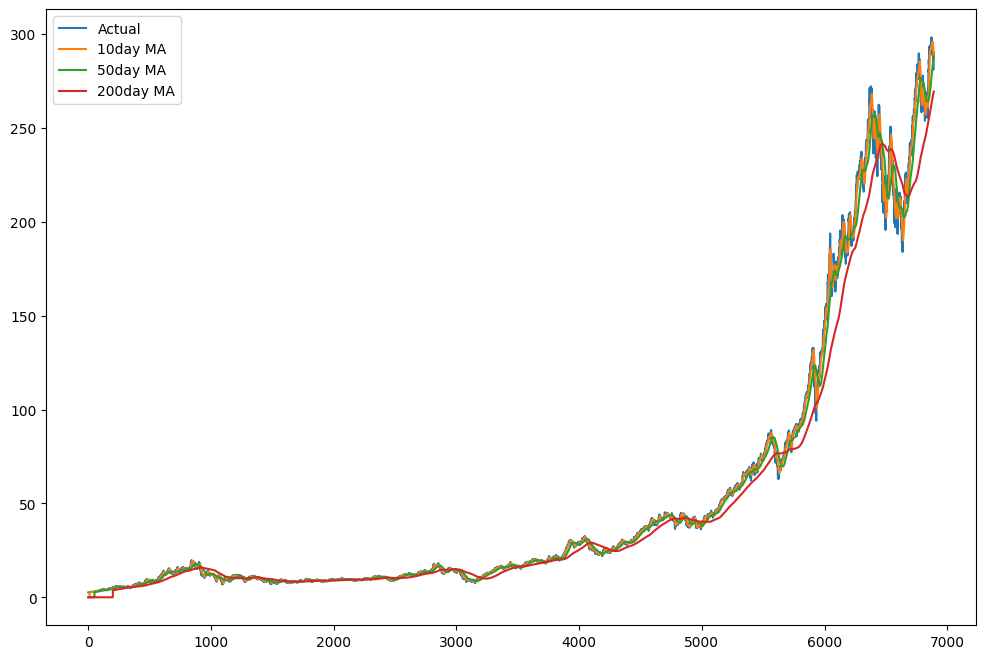

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6891 entries, 0 to 6890
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              6891 non-null   float64
 1   High              6891 non-null   float64
 2   Low               6891 non-null   float64
 3   Close             6891 non-null   float64
 4   daily_return      6891 non-null   float64
 5   cum_daily_return  6891 non-null   float64
 6   H-L               6891 non-null   float64
 7   C-O               6891 non-null   float64
 8   10day MA          6891 non-null   float64
 9   50day MA          6891 non-null   float64
 10  200day MA         6891 non-null   float64
 11  rsi               6877 non-null   float64
 12  Williams %R       6878 non-null   float64
 13  ma7               6891 non-null   float64
 14  ma21              6891 non-null   float64
 15  ema_26            6891 non-null   float64
 16  ema_12            6891 non-null   float64


In [14]:
plt.figure(figsize=(12, 8))
plt.plot(tek_ind_1['Close'], label='Actual')
plt.plot(tek_ind_1['10day MA'], label='10day MA')
plt.plot(tek_ind_1['50day MA'], label='50day MA')
plt.plot(tek_ind_1['200day MA'], label='200day MA')

plt.legend(loc='best')
plt.show()
print(tek_ind_1.info())

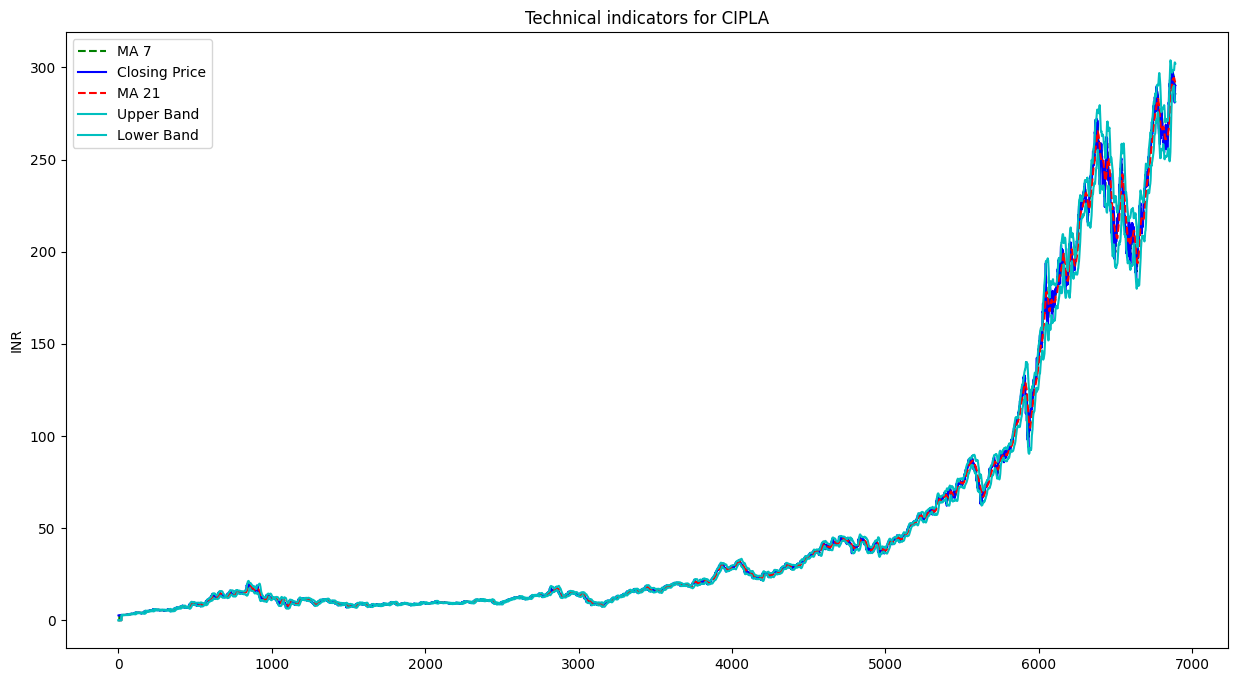

In [15]:
# Plot first subplot
plt.figure(figsize=(15,8))
plt.plot(tek_ind_1['ma7'],label='MA 7', color='g',linestyle='--')
plt.plot(tek_ind_1['Close'],label='Closing Price', color='b')
plt.plot(tek_ind_1['ma21'],label='MA 21', color='r',linestyle='--')
plt.plot(tek_ind_1['bb_high'],label='Upper Band', color='c')
plt.plot(tek_ind_1['bb_low'],label='Lower Band', color='c')
plt.title('Technical indicators for CIPLA')
plt.ylabel('INR')
plt.legend()

<b><h2> Tek_ind_2_DF

In [16]:
def stok(df, n):
    tek_ind_2['stok'] = ((tek_ind_2['Close'] - tek_ind_2['Low'].rolling(window=n, center=False).mean()) /
                  (tek_ind_2['High'].rolling(window=n, center=False).max() -
                   tek_ind_2['Low'].rolling(window=n, center=False).min())) * 100
    tek_ind_2['stok'] = tek_ind_2['stok'].rolling(window = 3, center=False).mean()

stok(tek_ind_2, 4)
tek_ind_2 = tek_ind_2.fillna(0)
tek_ind_2.tail()

,Open,High,Low,Close,stok
6886,282.101800,283.780007,279.667320,280.980048,-17.918024
6887,282.297137,287.352448,281.669842,287.154474,16.624908
6888,284.816771,287.194515,283.477004,287.122053,48.462261
6889,286.589050,290.921794,286.183007,290.287446,72.904771
6890,291.628923,293.575238,287.197767,290.332600,63.390154


In [17]:
#Calculation of Price Rate of Change
# ROC = [(Close - Close n periods ago) / (Close n periods ago)] * 100

tek_ind_2['ROC'] = ((tek_ind_2['Close'] - tek_ind_2['Close'].shift(12)) /
                    (tek_ind_2['Close'].shift(12)))*100
tek_ind_2 = tek_ind_2.fillna(0)

#Calculation of Momentum
tek_ind_2['Momentum'] = tek_ind_2['Close'] - tek_ind_2['Close'].shift(4)
tek_ind_2 = tek_ind_2.fillna(0)

#Calculation of Commodity Channel Index
tp = (tek_ind_2['High'] + tek_ind_2['Low'] + tek_ind_2['Close']) / 3
ma = tp / 20
md = (tp - ma) / 20
tek_ind_2['CCI'] = (tp-ma)/(0.015 * md)

# Calculation of Triple Exponential Moving Average
# Triple Exponential MA Formula:
# T-EMA = (3EMA – 3EMA(EMA)) + EMA(EMA(EMA))
# Where:
# EMA = EMA(1) + α * (Close – EMA(1))
# α = 2 / (N + 1)
# N = The smoothing period.

tek_ind_2['ema'] = tek_ind_2['Close'].ewm(span=3,min_periods=0,adjust=True,ignore_na=False).mean()
tek_ind_2 = tek_ind_2.fillna(0)

tek_ind_2['tema'] = (3 * tek_ind_2['ema'] - 3 * tek_ind_2['ema'] * tek_ind_2['ema']) + (tek_ind_2['ema'] *
                                                                                        tek_ind_2['ema'] *
                                                                                        tek_ind_2['ema'])


# Turning Line
high = tek_ind_2['High'].rolling(window=9,center=False).max()
low = tek_ind_2['Low'].rolling(window=9,center=False).min()
tek_ind_2['turning_line'] = (high + low) / 2

# Standard Line
p26_high = tek_ind_2['High'].rolling(window=26,center=False).max()
p26_low = tek_ind_2['Low'].rolling(window=26,center=False).min()
tek_ind_2['standard_line'] = (p26_high + p26_low) / 2

# Leading Span 1
tek_ind_2['ichimoku_span1'] = ((tek_ind_2['turning_line'] + tek_ind_2['standard_line']) / 2).shift(26)

# Leading Span 1
tek_ind_2['ichimoku_span1'] = ((tek_ind_2['turning_line'] + tek_ind_2['standard_line']) / 2).shift(26)

# Leading Span 2
p52_high = tek_ind_2['High'].rolling(window=52,center=False).max()
p52_low = tek_ind_2['Low'].rolling(window=52,center=False).min()
tek_ind_2['ichimoku_span2'] = ((p52_high + p52_low) / 2).shift(26)

# The most current closing price plotted 22 time periods behind (optional)
tek_ind_2['chikou_span'] = tek_ind_2['Close'].shift(-22) # 22 according to investopedia

<b><h3>PLOT FOURIER

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


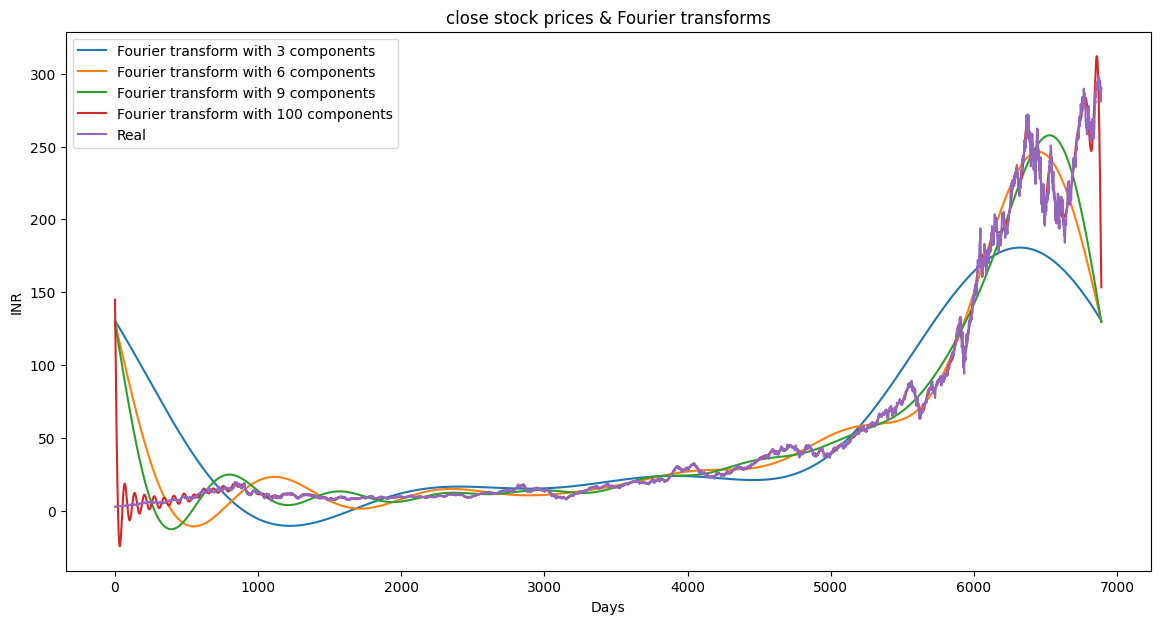

In [18]:
close_fft = np.fft.fft(np.asarray(dataset.Close.tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(tek_ind_2.Close,  label='Real')
plt.xlabel('Days')
plt.ylabel('INR')
plt.title('close stock prices & Fourier transforms')
plt.legend()
plt.show()